In [2]:
import matplotlib.pyplot as plt
import numpy as np
import heptools as ht
import mplhep as hep
import pandas as pd

In [3]:
signal = pd.read_parquet("data/analysis_Signal.parquet")
signal2 = pd.read_parquet("data/analysis_Signal2.parquet")
bkg1   = pd.read_parquet("data/analysis_Bkg1.parquet")
bkg2   = pd.read_parquet("data/analysis_Bkg2.parquet")
bkg3   = pd.read_parquet("data/analysis_Bkg3.parquet")
bkg4   = pd.read_parquet("data/analysis_Bkg4.parquet")

In [4]:
signal.head()

,W_mass,BB_mass,BBA_mass,Njet,dB_delta_r,dB_delta_eta,dB_delta_phi,bP_delta_r,photon_energy,photon_pt,aB_delta_r,aL_delta_r_lepton,fake_top_mass
0,115.672966,117.957619,211.079178,3,0.772777,0.054302,0.770867,3.188988,27.888943,23.539507,2.871964,0.015203,453.457537
1,74.940422,88.803009,155.453125,3,2.988265,1.997166,2.222848,2.094522,82.722878,34.767899,2.618192,3.656461,122.931860
2,82.264130,109.182114,161.152298,2,1.662667,1.639882,0.274317,1.062954,118.677513,76.990311,1.371221,3.031474,343.890028
3,55.919502,47.995262,135.860611,3,1.304739,0.330856,1.262093,1.635499,112.379036,84.105591,1.988346,2.289839,212.327358
4,108.277283,35.143261,144.546539,10,0.623320,0.616110,0.094535,1.800713,55.298241,52.227161,1.955876,2.088055,224.178465


In [43]:
# runType = 'Run2'
# runType = 'Run3'
runType = 'HL-LHC'

signal_info= ht.HEPExp()
signal_info.set_LHC(run=runType)
signal_info.set_xsec(0.01142, 'pb')
signal_info.set_simulation(500000)
signal2_info = ht.HEPExp()
signal2_info.set_LHC(run=runType)
signal2_info.set_xsec(0.0038, 'pb')
signal2_info.set_simulation(220496)
bkg1_info = ht.HEPExp()
bkg1_info.set_LHC(run=runType)
bkg1_info.set_xsec(2.073, 'pb')
bkg1_info.set_simulation(100000)
bkg2_info = ht.HEPExp()
bkg2_info.set_LHC(run=runType)
bkg2_info.set_xsec(0.315, 'pb')
bkg2_info.set_simulation(100000)
bkg3_info = ht.HEPExp()
bkg3_info.set_LHC(run=runType)
bkg3_info.set_xsec(116.2, 'pb')
bkg3_info.set_simulation(100000)
bkg4_info = ht.HEPExp()
bkg4_info.set_LHC(run=runType)
bkg4_info.set_xsec(0.3564, 'pb')
bkg4_info.set_simulation(100000)
lumi=[
bkg1_info.get_event()*len(bkg1['Njet'])/100000,
bkg2_info.get_event()*len(bkg2['Njet'])/100000,
bkg3_info.get_event()*len(bkg3['Njet'])/100000,
bkg4_info.get_event()*len(bkg4['Njet'])/100000,
signal_info.get_event()*len(signal['Njet'])/500000,
signal2_info.get_event()*len(signal2['Njet'])/220496
]
print(lumi)

[180413.19, 12937.05, 31374.0, 481.14, 48.85476, 158.93077425440825]


In [44]:
signal_L2 = pd.read_parquet("data/analysis_Signal_L2.parquet")
signal2_L2 = pd.read_parquet("data/analysis_Signal2_L2.parquet")
bkg1_L2   = pd.read_parquet("data/analysis_Bkg1_L2.parquet")
bkg2_L2   = pd.read_parquet("data/analysis_Bkg2_L2.parquet")
bkg3_L2   = pd.read_parquet("data/analysis_Bkg3.parquet")
bkg4_L2   = pd.read_parquet("data/analysis_Bkg4_L2.parquet")
lumi_L2=[
bkg1_info.get_event()*len(bkg1_L2['Njet'])/100000,
bkg2_info.get_event()*len(bkg2_L2['Njet'])/100000,
bkg3_info.get_event()*len(bkg3_L2['Njet'])/100000*0,
bkg4_info.get_event()*len(bkg4_L2['Njet'])/100000,
signal_info.get_event()*len(signal_L2['Njet'])/500000,
signal2_info.get_event()*len(signal2_L2['Njet'])/220496
]
print(lumi_L2)

[79665.39, 7267.05, 0.0, 363.528, 34.6026, 122.3260285900878]


In [45]:
bkg1_L2.head()

,W_mass,BB_mass,BBA_mass,Njet,dB_delta_r,dB_delta_eta,dB_delta_phi,bP_delta_r,photon_energy,photon_pt,aB_delta_r,aL_delta_r_lepton,fake_top_mass
0,406.822784,344.579620,1022.235901,4,1.820052,1.049113,1.487263,3.040561,478.602203,427.754089,3.231207,0.738439,848.838723
1,83.704353,156.271530,494.533417,4,1.527516,1.293780,0.812057,2.775284,259.308228,216.702682,3.168512,2.442870,281.819232
2,81.412598,129.491562,148.338165,4,2.120295,1.879598,0.981203,1.040993,23.568871,21.547739,1.586749,2.102210,202.951057
3,129.170776,175.323456,350.749603,4,2.071455,0.793360,1.913506,2.504569,216.269547,148.800308,3.054265,1.374074,343.848554
4,17.778170,139.691513,326.383789,5,1.722584,1.718747,0.114911,1.984220,192.178833,114.134087,2.038828,2.123681,551.410698


In [8]:
def plot_stacked_fill(bins, datasets, labels=None, colors=None, alpha=0.5, 
                     signal_data=None, signal_labels=None, stack_signals_with_bg=False):
    """
    绘制堆叠填充图
    
    Parameters:
    -----------
    bins : array-like
        bin边界
    datasets : list of array-like
        要堆叠的数据列表
    labels : list of str, optional
        每个数据集的标签
    colors : list, optional
        颜色列表
    alpha : float
        透明度
    signal_data : array-like or list of array-like, optional
        信号数据（可以是单个数组或多个信号的列表）
    signal_labels : str or list of str, optional
        信号标签（可以是单个字符串或多个标签的列表）
    stack_signals_with_bg : bool
        是否将信号与背景堆叠绘制（True）或单独显示（False）
    """
    
    n_datasets = len(datasets)
    
    # 处理信号数据格式
    if signal_data is not None:
        # 如果信号数据是单个数组，转换为列表
        if not isinstance(signal_data, list) or (isinstance(signal_data, list) and 
                                                 not isinstance(signal_data[0], (list, np.ndarray))):
            signal_data = [signal_data]
        
        n_signals = len(signal_data)
        
        # 处理信号标签
        if signal_labels is None:
            signal_labels = [f'Signal {i+1}' for i in range(n_signals)]
        elif isinstance(signal_labels, str):
            signal_labels = [signal_labels]
        elif len(signal_labels) != n_signals:
            signal_labels = [f'Signal {i+1}' for i in range(n_signals)]
    else:
        n_signals = 0
        signal_labels = []
    
    # 默认标签
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(n_datasets)]
    
    # 默认颜色
    total_items = n_datasets + n_signals
    if colors is None:
        colors = plt.cm.tab10(np.arange(total_items))
    
    # 计算背景累积堆叠
    cumulative = np.zeros_like(datasets[0])
    
    # 绘制背景堆叠
    for i, (data, label, color) in enumerate(zip(datasets, labels, colors)):
        plt.fill_between(bins[:-1], cumulative, cumulative + data, 
                        step='post', color=color, alpha=alpha, label=label)
        cumulative += data
    
    # 绘制信号
    if signal_data is not None:
        if stack_signals_with_bg:
            # 将信号与背景堆叠
            signal_cumulative = cumulative.copy()
            for i, (data, label) in enumerate(zip(signal_data, signal_labels)):
                signal_color = colors[n_datasets + i] if len(colors) > n_datasets + i else plt.cm.tab10(n_datasets + i)
                plt.fill_between(bins[:-1], signal_cumulative, signal_cumulative + data, 
                                step='post', color=signal_color, alpha=alpha, label=label)
                signal_cumulative += data
        else:
            # 信号单独堆叠显示
            signal_cumulative = np.zeros_like(signal_data[0])
            for i, (data, label) in enumerate(zip(signal_data, signal_labels)):
                signal_color = colors[n_datasets + i] if len(colors) > n_datasets + i else plt.cm.tab10(n_datasets + i)
                plt.fill_between(bins[:-1], signal_cumulative, signal_cumulative + data, 
                                step='post', color=signal_color, alpha=alpha, label=label)
                signal_cumulative += data

* # # * # * # # # * # # * # # 

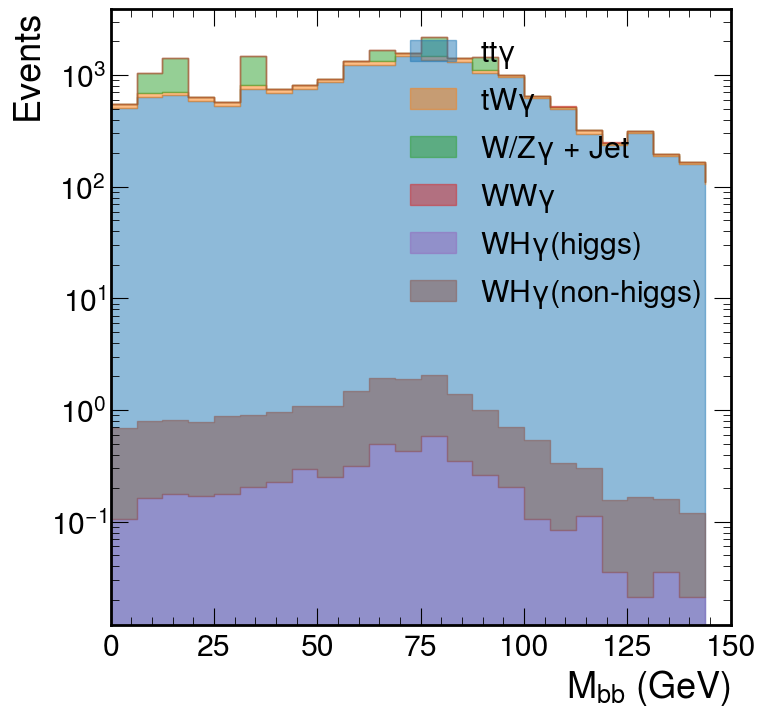

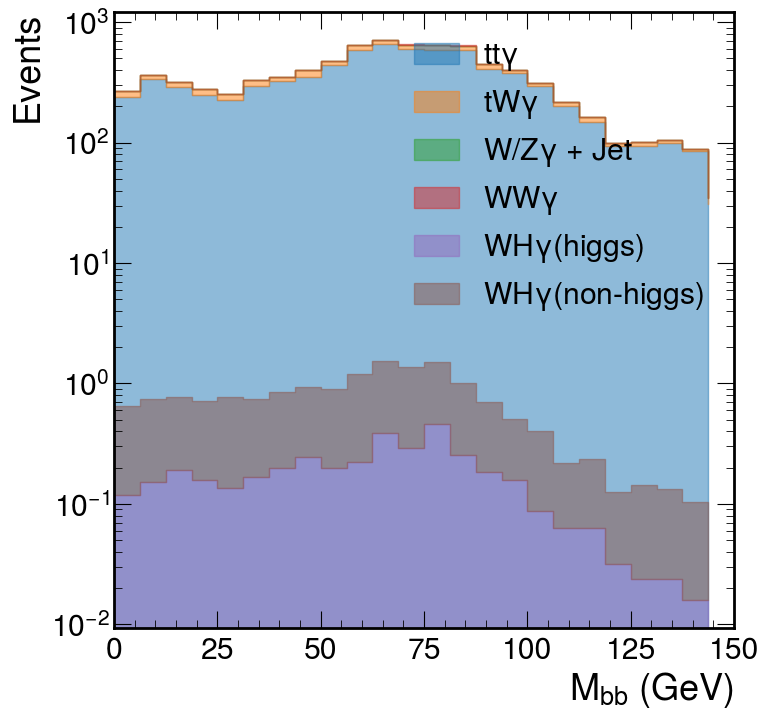

In [29]:
def plot_tag(selected_datasets, field, bins=None, stack_signals_with_bg=False, lumi_set=None, xlabel_t='None', xleft=0, xright=200, xbin=50):
    """
    通用分布堆叠绘图函数。
    
    Parameters:
    -----------
    selected_datasets : list of str
        要绘制的 DataFrame 名称列表，必须在全局命名空间中以同名变量存在，
        比如 ['bkg1','bkg2','bkg3','bkg4','signal','signal2']。
    field : str
        DataFrame 中要绘制的列名，比如 'BB_mass'。
    bins : array‐like, optional
        直方图分箱边界，默认 np.linspace(0,200,50)。
    stack_signals_with_bg : bool
        如果 True 则信号与背景一起堆叠，否则单独绘制信号。
    """
    if bins is None:
        bins = np.linspace(xleft, xright, xbin)
    
    # lumi 映射：名字 -> 对应 lumi 值
    lumi_map = dict(zip(
        selected_datasets,
        lumi_set
    ))
    
    # 计算每个样本的直方图统计量
    hist_means = {}
    for name in selected_datasets:
        df = globals()[name]
        arr = df[field].dropna().values
        # 计算时刻度按 lumi +1
        ev_scale = int(lumi_map.get(name, 0)) + 1
        # print(f"Processing {name} with lumi scale {ev_scale}")
        mean, std, centers = ht.calculate_hist_stats(arr, ev_scale, bins)
        hist_means[name] = mean
    
    # 自动将以 signal 开头的样本当成信号，其余当背景
    signals = [n for n in selected_datasets if n.startswith('signal')]
    backgrounds = [n for n in selected_datasets if n not in signals]
    
    # 颜色
    total = len(backgrounds) + len(signals)
    palette = plt.cm.tab10(np.arange(total))
    
    # 开始绘图
    plt.figure(figsize=(8, 8))
    plt.style.use(hep.style.CMS)
    bck_label_dict = {
        'bkg1':     r'$tt\gamma$',
        'bkg1_L2':  r'$tt\gamma$',
        'bkg2':     r'$tW\gamma$',
        'bkg2_L2':  r'$tW\gamma$',
        'bkg3':     r'$W/Z \gamma$ + Jet',
        'bkg3_L2':  r'$W/Z \gamma$ + Jet',
        'bkg4':     r'$WW\gamma$',
        'bkg4_L2':  r'$WW\gamma$'
    }
    sig_label_dict = {
        'signal':      r'$WH\gamma$(higgs)',
        'signal_L2':   r'$WH\gamma$(higgs)',
        'signal2':     r'$WH\gamma$(non-higgs)',
        'signal2_L2':  r'$WH\gamma$(non-higgs)'
    }
    plot_stacked_fill(
        bins=bins,
        datasets=[hist_means[b] for b in backgrounds],
        labels=[bck_label_dict.get(b, b) for b in backgrounds],
        colors=palette[:len(backgrounds)],
        signal_data=[hist_means[s] for s in signals],
        signal_labels=[sig_label_dict.get(s, s) for s in signals],
        stack_signals_with_bg=stack_signals_with_bg
    )
    plt.xlabel(xlabel_t)
    plt.ylabel("Events")
    plt.xlim(bins[0], bins[-1])
    plt.yscale('log')
    plt.legend(loc='upper right')

# 示例调用：
plot_tag(
    ['bkg1','bkg2','bkg3','bkg4','signal','signal2'],
    field='W_mass',
    lumi_set=lumi,
    xlabel_t='$M_{bb}$ (GeV)',
    xleft=0, xright=150, xbin=25
)

plot_tag(
    ['bkg1_L2','bkg2_L2','bkg3_L2','bkg4_L2','signal_L2','signal2_L2'],
    field='W_mass',
    lumi_set=lumi_L2,
    xlabel_t='$M_{bb}$ (GeV)',
    xleft=0, xright=150, xbin=25
)

* # # * # # 

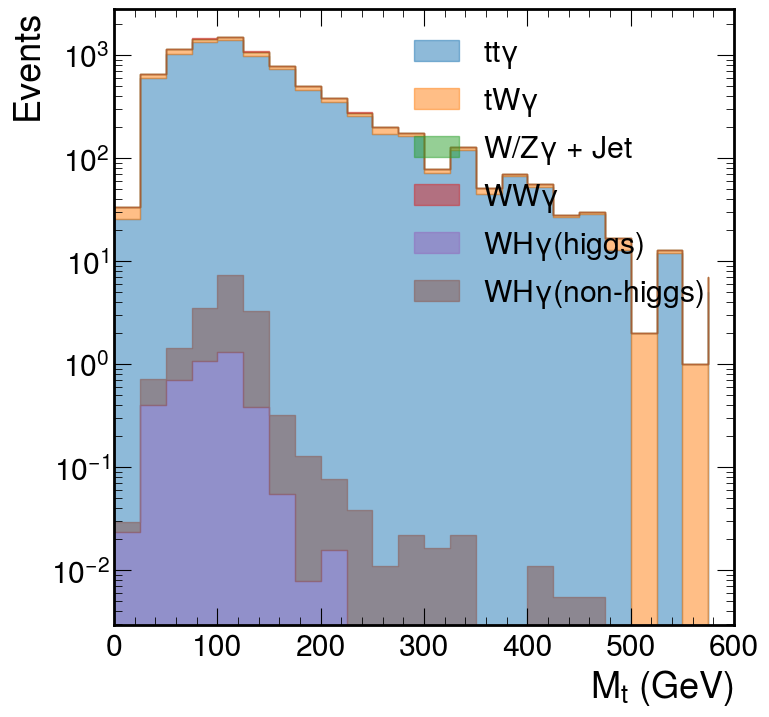

In [30]:
plot_tag(['bkg1_L2','bkg2_L2','bkg3_L2','bkg4_L2','signal_L2','signal2_L2'],
    field='BB_mass',
    lumi_set=lumi_L2,
    xlabel_t='$M_{t}$ (GeV)',
    xleft=0, xright=600, xbin=25,
    # stack_signals_with_bg=True
)

* # # * # # 

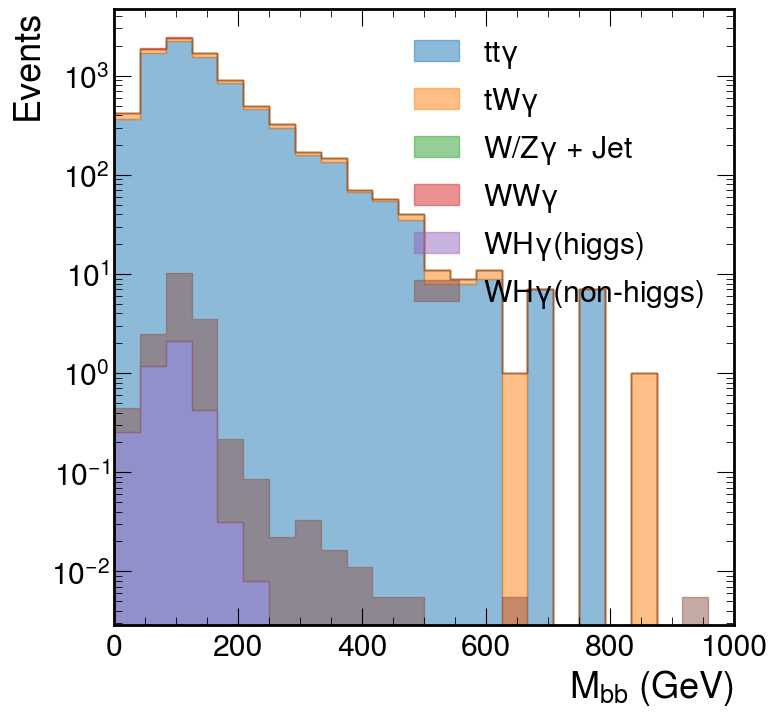

In [38]:
plot_tag(
    ['bkg1_L2','bkg2_L2','bkg3_L2','bkg4_L2','signal_L2','signal2_L2'],
    field='BB_mass',
    lumi_set=lumi_L2,
    xlabel_t='$M_{bb}$ (GeV)',
    xleft=0, xright=1000, xbin=25,
    # stack_signals_with_bg=True
)

In [26]:
def plot_and_significance(selected_datasets, field, bins=None, stack_signals_with_bg=False, lumi_set=None, xlabel_t='None', xleft=0, xright=200, xbin=50, left=50, right=100):
    """
    通用质量分布堆叠绘图函数。
    
    Parameters:
    -----------
    selected_datasets : list of str
        要绘制的 DataFrame 名称列表，必须在全局命名空间中以同名变量存在，
        比如 ['bkg1','bkg2','bkg3','bkg4','signal','signal2']。
    field : str
        DataFrame 中要绘制的列名，比如 'BB_mass'。
    bins : array‐like, optional
        直方图分箱边界，默认 np.linspace(0,200,50)。
    stack_signals_with_bg : bool
        如果 True 则信号与背景一起堆叠，否则单独绘制信号。
    """
    if bins is None:
        bins = np.linspace(xleft, xright, xbin)
    binwidth = bins[1] - bins[0]
    # lumi 映射：名字 -> 对应 lumi 值
    lumi_map = dict(zip(
        # ['signal','bkg1','bkg2','bkg3','bkg4','signal2'],
        selected_datasets,
        lumi_set
    ))
    
    # 计算每个样本的直方图统计量
    hist_means = {}
    for name in selected_datasets:
        df = globals()[name]
        arr = df[field].dropna().values
        # 计算时刻度按 lumi +1
        ev_scale = int(lumi_map.get(name, 0)) + 1
        mean, std, centers = ht.calculate_hist_stats(arr, ev_scale, bins)
        hist_means[name] = mean
    
    # 自动将以 signal 开头的样本当成信号，其余当背景
    signals = [n for n in selected_datasets if n.startswith('signal')]
    backgrounds = [n for n in selected_datasets if n not in signals]
    
    # 计算信号显著性
    # 计算信号在[left, right]区间的面积
    signal_areas = {}
    for name in signals:
        data = hist_means[name]
        # 计算[left, right]区间的面积
        area = np.sum(data[(bins[:-1] >= left) & (bins[:-1] <= right)])
        signal_areas[name] = area * binwidth
    
    # 计算背景在[left, right]区间的面积
    background_areas = {}
    for name in backgrounds:
        data = hist_means[name]
        # 计算[left, right]区间的面积
        area = np.sum(data[(bins[:-1] >= left) & (bins[:-1] <= right)])
        background_areas[name] = area * binwidth
    
    # 计算总背景面积
    total_bkg_area = sum(background_areas.values())
    
    # 计算总信号面积
    total_sig_area = sum(signal_areas.values())
    
    # 计算每个信号的显著性
    significance = {}
    for name in signals:
        sig_area = signal_areas[name]
        # 显著性 = S / sqrt(B)，避免除零
        sig_val = sig_area / np.sqrt(total_bkg_area) if total_bkg_area > 0 else 0
        significance[name] = sig_val
    
    # 计算总信号显著性
    total_significance = total_sig_area / np.sqrt(total_bkg_area) if total_bkg_area > 0 else 0
    
    # 打印显著性
    print("=" * 40)
    print(f"Calculation range: [{left}, {right}]")
    print("Signal Areas:", signal_areas)
    print("Background Areas:", background_areas)
    print("Total Signal Area:", total_sig_area)
    print("Total Background Area:", total_bkg_area)
    print("Individual Significance S/√B:", significance)
    print("Total Significance S/√B:", total_significance)
    print("=" * 40)


    # 颜色
    total = len(backgrounds) + len(signals)
    palette = plt.cm.tab10(np.arange(total))
    
    # 开始绘图
    plt.figure(figsize=(10, 10))
    plt.style.use(hep.style.CMS)

    # 定义标签字典
    bck_label_dict = {
        'bkg1':    r'$tt\gamma$',
        'bkg1_L2': r'$tt\gamma$',
        'bkg2':    r'$tW\gamma$',
        'bkg2_L2': r'$tW\gamma$',
        'bkg3':    r'$W/Z \gamma$ + Jet',
        'bkg3_L2': r'$W/Z \gamma$ + Jet',
        'bkg4':    r'$WW\gamma$',
        'bkg4_L2': r'$WW\gamma$'
    }
    sig_label_dict = {
        'signal':    r'$WH\gamma$(higgs)',
        'signal_L2': r'$WH\gamma$(higgs)',
        'signal2':    r'$WH\gamma$(non-higgs)',
        'signal2_L2': r'$WH\gamma$(non-higgs)'
    }

    # 如果需要对 backgrounds/signals 进行筛选，可在此处定义
    valid_backgrounds = backgrounds
    valid_signals     = signals

    plot_stacked_fill(
        bins=bins,
        datasets=[hist_means[b] for b in valid_backgrounds],
        labels=[bck_label_dict.get(b.replace('_njet_cut',''), b.replace('_njet_cut',''))
                for b in valid_backgrounds],
        colors=palette[:len(valid_backgrounds)],
        signal_data=[hist_means[s] for s in valid_signals],
        signal_labels=[sig_label_dict.get(s.replace('_njet_cut',''), s.replace('_njet_cut',''))
                       for s in valid_signals],
        stack_signals_with_bg=stack_signals_with_bg
    )
    plt.xlabel(xlabel_t)
    plt.ylabel("Events")
    plt.xlim(bins[0], bins[-1])
    plt.yscale('log')
    plt.legend(loc='upper right')

* # # * # # ========================================
Calculation range: [75, 150]
Signal Areas: {'signal_L2': 23.478835978835978, 'signal2_L2': 95.7875457875458}
Background Areas: {'bkg1_L2': 32566.666666666668, 'bkg2_L2': 2800.0, 'bkg3_L2': 3.7037037037037037, 'bkg4_L2': 183.33333333333334}
Total Signal Area: 119.26638176638177
Total Background Area: 35553.70370370371
Individual Significance S/√B: {'signal_L2': 0.12451857372592623, 'signal2_L2': 0.5080034032744831}
Total Significance S/√B: 0.6325219770004094


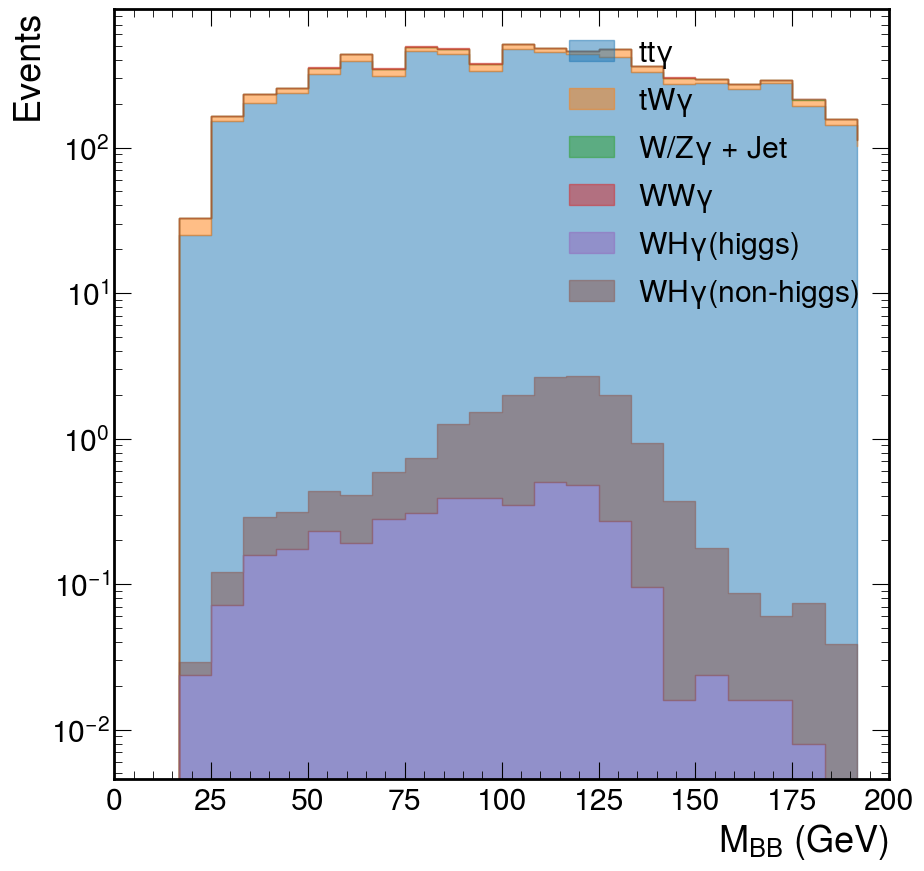

In [27]:
plot_and_significance(
    ['bkg1_L2','bkg2_L2','bkg3_L2','bkg4_L2','signal_L2','signal2_L2'],
    field='BB_mass',
    lumi_set=lumi_L2,
    xlabel_t='$M_{BB}$ (GeV)',
    xleft=0, xright=200, xbin=25,
    # stack_signals_with_bg=True,
    left=75, right=150
)

In [14]:
def plot_tag_with_njet_cut(selected_datasets, field,
                           bins=None, stack_signals_with_bg=False,
                           lumi_set=None, xlabel_t='None',
                           xleft=0, xright=200, 
                           left=0, right=200,
                           xbin=50,njet_min=0, njet_max=2):
    """
    Wraps your plot_tag to first apply Njet∈[njet_min,njet_max] to each dataset.
    """
    # prepare names for the sliced versions
    sliced_names = []
    for name in selected_datasets:
        df = globals()[name]
        df_cut = df[df['Njet'].between(njet_min, njet_max)]
        cut_name = f"{name}_cut"
        globals()[cut_name] = df_cut
        sliced_names.append(cut_name)

    # now call your existing plot_tag on the sliced samples
    plot_and_significance(
        sliced_names, field,
        bins=bins,
        stack_signals_with_bg=stack_signals_with_bg,
        lumi_set=lumi_set,
        xlabel_t=xlabel_t,
        xleft=xleft,
        xright=xright,
        xbin=xbin,
        left=left, right=right
    )
    plt.text(0.05, 0.95, f"Njet ∈ [{njet_min}, {njet_max}]", 
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

    # optional: delete the temp names if you don’t need them
    # for cut_name in sliced_names:
    #     del globals()[cut_name]


In [34]:
def plot_and_significance_with_njet_cut(selected_datasets, field, bins=None, stack_signals_with_bg=False, lumi_set=None, xlabel_t='None', xleft=0, xright=200, xbin=50, left=50, right=100, njet_min=0, njet_max=2):
    """
    通用质量分布堆叠绘图函数，带Njet切割，能处理无事例的情况。
    
    Parameters:
    -----------
    selected_datasets : list of str
        要绘制的 DataFrame 名称列表，必须在全局命名空间中以同名变量存在，
        比如 ['bkg1','bkg2','bkg3','bkg4','signal','signal2']。
    field : str
        DataFrame 中要绘制的列名，比如 'BB_mass'。
    bins : array‐like, optional
        直方图分箱边界，默认 np.linspace(0,200,50)。
    stack_signals_with_bg : bool
        如果 True 则信号与背景一起堆叠，否则单独绘制信号。
    njet_min, njet_max : int
        Njet的范围 [njet_min, njet_max]
    """
    if bins is None:
        bins = np.linspace(xleft, xright, xbin)
    binwidth = bins[1] - bins[0]
    # lumi 映射：名字 -> 对应 lumi 值
    lumi_map = dict(zip(
        # ['signal','bkg1','bkg2','bkg3','bkg4','signal2'],
        selected_datasets,
        lumi_set
    ))
    
    # 对每个数据集应用Njet切割，并计算直方图统计量
    hist_means = {}
    sliced_names = []
    
    for name in selected_datasets:
        df = globals()[name]
        # 应用Njet切割
        df_cut = df[df['Njet'].between(njet_min, njet_max)]
        cut_name = f"{name}_njet_cut"
        globals()[cut_name] = df_cut
        sliced_names.append(cut_name)
        
        # 处理空数据集的情况
        if len(df_cut) == 0:
            print(f"Warning: {name} has no events after Njet cut [{njet_min}, {njet_max}]")
            # 创建全零的直方图
            hist_means[cut_name] = np.zeros(len(bins) - 1)
        else:
            # 计算直方图统计量
            arr = df_cut[field].dropna().values
            if len(arr) == 0:
                print(f"Warning: {name} has no valid {field} values after cuts")
                hist_means[cut_name] = np.zeros(len(bins) - 1)
            else:
                ev_scale = int(lumi_map.get(name, 0)) + 1
                mean, std, centers = ht.calculate_hist_stats(arr, ev_scale, bins)
                hist_means[cut_name] = mean
    
    # 自动将以 signal 开头的样本当成信号，其余当背景
    signals = [n for n in sliced_names if n.startswith('signal')]
    backgrounds = [n for n in sliced_names if n not in signals]
    
    # 计算信号在[left, right]区间的面积
    signal_areas = {}
    for name in signals:
        data = hist_means[name]
        # 安全地计算面积，处理空数组情况
        try:
            mask = (bins[:-1] >= left) & (bins[:-1] <= right)
            if np.any(mask):
                area = np.sum(data[mask] * binwidth)
            else:
                area = 0.0
                print(f"Warning: No bins in range [{left}, {right}] for {name}")
        except Exception as e:
            print(f"Error calculating area for {name}: {e}")
            area = 0.0
        signal_areas[name] = area
    
    # 计算背景在[left, right]区间的面积
    background_areas = {}
    for name in backgrounds:
        data = hist_means[name]
        # 安全地计算面积，处理空数组情况
        try:
            mask = (bins[:-1] >= left) & (bins[:-1] <= right)
            if np.any(mask):
                area = np.sum(data[mask] * binwidth)
            else:
                area = 0.0
                print(f"Warning: No bins in range [{left}, {right}] for {name}")
        except Exception as e:
            print(f"Error calculating area for {name}: {e}")
            area = 0.0
        background_areas[name] = area
    
    # 计算总背景面积和总信号面积
    total_bkg_area = sum(background_areas.values())
    total_sig_area = sum(signal_areas.values())
    
    # 计算每个信号的显著性
    significance = {}
    for name in signals:
        sig_area = signal_areas[name]
        if total_bkg_area > 0:
            sig_val = sig_area / np.sqrt(total_bkg_area)
        else:
            sig_val = float('inf') if sig_area > 0 else 0.0
            if total_bkg_area == 0:
                print(f"Warning: Total background area is 0, significance for {name} set to {'inf' if sig_area > 0 else '0'}")
        significance[name] = sig_val
    
    # 计算总信号显著性
    if total_bkg_area > 0:
        total_significance = total_sig_area / np.sqrt(total_bkg_area)
    else:
        total_significance = float('inf') if total_sig_area > 0 else 0.0
        if total_bkg_area == 0:
            print(f"Warning: Total background area is 0, total significance set to {'inf' if total_sig_area > 0 else '0'}")
    
    # 打印显著性
    print("=" * 50)
    print(f"Njet cut: [{njet_min}, {njet_max}]")
    print(f"Calculation range: [{left}, {right}]")
    print("Signal Areas:", signal_areas)
    print("Background Areas:", background_areas)
    print("Total Signal Area:", total_sig_area)
    print("Total Background Area:", total_bkg_area)
    print("Individual Significance S/√B:", significance)
    print("Total Significance S/√B:", total_significance)
    print("=" * 50)

    # 检查是否有有效数据用于绘图
    has_valid_data = any(np.sum(hist_means[name]) > 0 for name in sliced_names)
    if not has_valid_data:
        print("Warning: No valid data for plotting after all cuts")
        return
    
    # 颜色
    total = len(backgrounds) + len(signals)
    palette = plt.cm.tab10(np.arange(total))
    
    # 开始绘图
    plt.figure(figsize=(10, 10))
    plt.style.use(hep.style.CMS)
    
    # 过滤掉空数据集
    valid_backgrounds = [b for b in backgrounds if np.sum(hist_means[b]) > 0]
    valid_signals = [s for s in signals if np.sum(hist_means[s]) > 0]
    
    if len(valid_backgrounds) == 0 and len(valid_signals) == 0:
        print("Warning: No valid datasets for plotting")
        return
    bck_label_dict = {
        'bkg1' : r'$tt\gamma$',
        'bkg1_L2' : r'$tt\gamma$',
        'bkg2' : r'$tW\gamma$',
        'bkg2_L2' : r'$tW\gamma$',
        'bkg3' : r'$W/Z \gamma$ + Jet',
        'bkg3_L2' : r'$W/Z \gamma$ + Jet',
        'bkg4' : r'$WW\gamma$',
        'bkg4_L2' : r'$WW\gamma$'
    }
    sig_label_dict = {
        'signal' : r'$WH\gamma$(higgs)',
        'signal_L2' : r'$WH\gamma$(higgs)',
        'signal2' : r'$WH\gamma$(non-higgs)',
        'signal2_L2' : r'$WH\gamma$(non-higgs)'
    }
    plot_stacked_fill(
        bins=bins,
        datasets=[hist_means[b] for b in valid_backgrounds],
        labels=[bck_label_dict.get(b.replace('_njet_cut', ''), b.replace('_njet_cut', ''))
                for b in valid_backgrounds],
        colors=palette[:len(valid_backgrounds)],
        signal_data=[hist_means[s] for s in valid_signals],
        signal_labels=[sig_label_dict.get(s.replace('_njet_cut', ''), s.replace('_njet_cut', ''))
                       for s in valid_signals],
        stack_signals_with_bg=stack_signals_with_bg
    )
    plt.xlabel(xlabel_t)
    plt.ylabel("Events")
    plt.xlim(bins[0], bins[-1])
    plt.yscale('log')
    plt.legend(loc='upper right')
    
    # 添加Njet切割信息到图上
    plt.text(0.05, 0.95, f"Njet ∈ [{njet_min}, {njet_max}]", 
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
    
    # 可选：删除临时变量
    # for cut_name in sliced_names:
    #     del globals()[cut_name]


* # * # * # # # ==================================================
Njet cut: [2, 2]
Calculation range: [75, 150]
Signal Areas: {'signal_L2_njet_cut': 23.03030303030303, 'signal2_L2_njet_cut': 102.22222222222224}
Background Areas: {'bkg1_L2_njet_cut': 36000.0, 'bkg2_L2_njet_cut': 3183.333333333334, 'bkg3_L2_njet_cut': 0.0, 'bkg4_L2_njet_cut': 250.0}
Total Signal Area: 125.25252525252527
Total Background Area: 39433.333333333336
Individual Significance S/√B: {'signal_L2_njet_cut': 0.11597594166388406, 'signal2_L2_njet_cut': 0.5147704077361872}
Total Significance S/√B: 0.6307463494000712


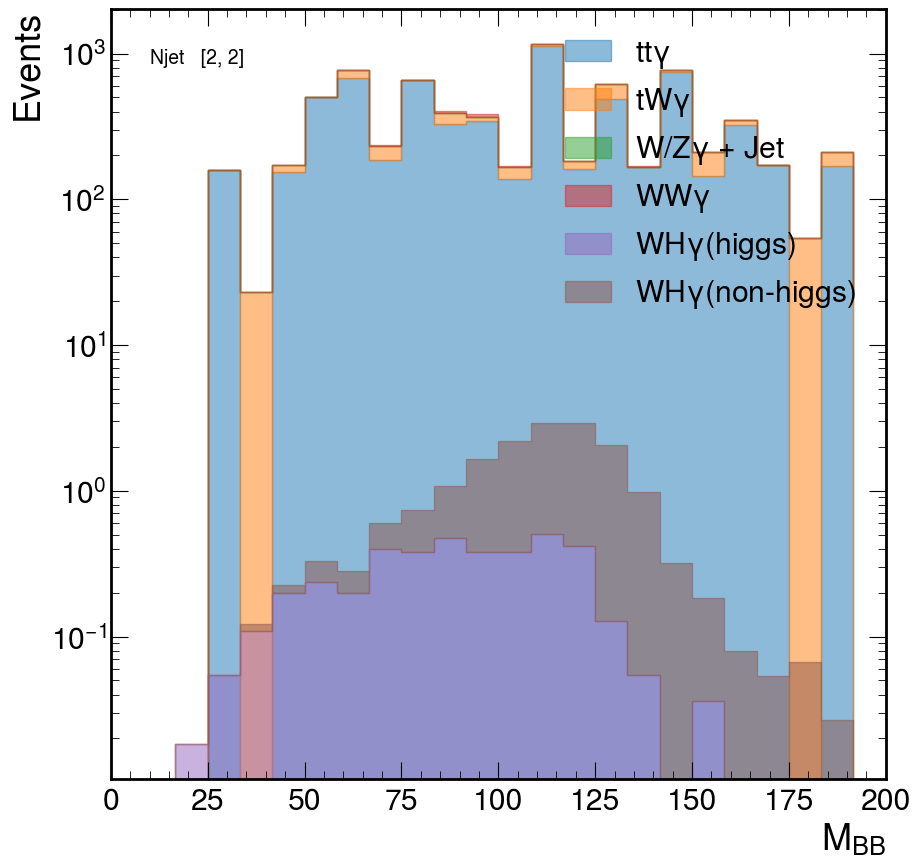

In [35]:
# plot_tag_with_njet_cut
plot_and_significance_with_njet_cut(['bkg1_L2','bkg2_L2','bkg3_L2','bkg4_L2','signal_L2','signal2_L2'],
    field='BB_mass',
    lumi_set=lumi_L2,
    xlabel_t='$M_{BB}$',
    xleft=0, xright=200, xbin=25,
    # stack_signals_with_bg=True,
    left=75, right=150,
    njet_min=2, njet_max=2
)

* # * # * # # # ==================================================
Njet cut: [2, 3]
Calculation range: [0, 5]
Signal Areas: {'signal_L2_njet_cut': 7.291666666666667, 'signal2_L2_njet_cut': 25.595238095238095}
Background Areas: {'bkg1_L2_njet_cut': 16597.083333333336, 'bkg2_L2_njet_cut': 1514.1666666666667, 'bkg3_L2_njet_cut': 0.20833333333333334, 'bkg4_L2_njet_cut': 75.83333333333334}
Total Signal Area: 32.88690476190476
Total Background Area: 18187.291666666668
Individual Significance S/√B: {'signal_L2_njet_cut': 0.05406830950714299, 'signal2_L2_njet_cut': 0.18979080071895088}
Total Significance S/√B: 0.24385911022609386


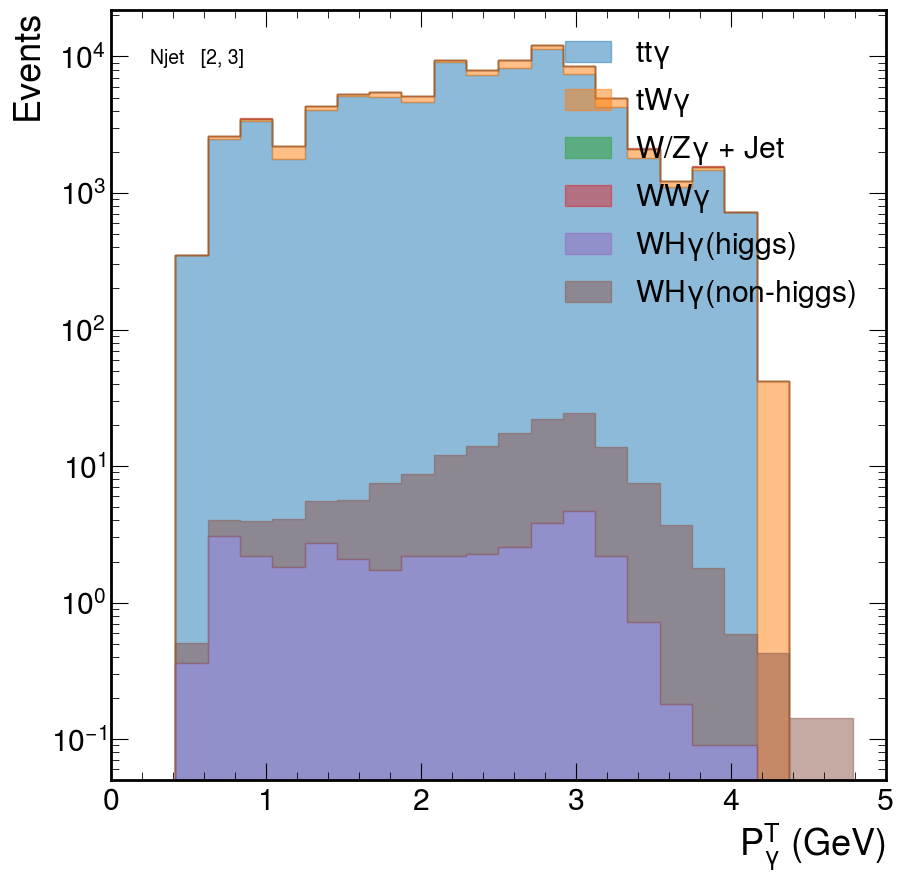

In [60]:
# plot_tag_with_njet_cut
plot_and_significance_with_njet_cut(['bkg1_L2','bkg2_L2','bkg3_L2','bkg4_L2','signal_L2','signal2_L2'],
    # 	photon_pt	aB_delta_r	aL_delta_r_lepton
    field='aB_delta_r',
    lumi_set=lumi_L2,
    xlabel_t='$P^T_{\gamma}$ (GeV)',
    xleft=0, xright=5, xbin=25,
    # stack_signals_with_bg=True,
    left=0, right=5,
    njet_min=2, njet_max=3
)